# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

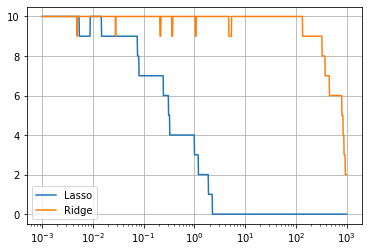

In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
samples = np.logspace(-3, 3, num = 1000)
y1, y2 = [], []
threshold = 0.6
for sample in samples:
    L1_regression = Lasso(alpha = sample)
    L1_regression.fit(X_train, y_train)
    y1.append(np.sum(abs(L1_regression.coef_) > threshold))

    L2_regression = Ridge(alpha = sample)
    L2_regression.fit(X_train, y_train)
    y2.append(np.sum(abs(L2_regression.coef_) > threshold))
plt.xscale('log')
plt.plot(samples, y1, label='Lasso')
plt.plot(samples, y2 ,label='Ridge')
plt.legend()
plt.grid()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

In [6]:
# code here
L2_regression = Ridge()
L2_regression.fit(X_train, y_train)
prediction = L2_regression.predict(X_test)
rmse = MSE(y_test,prediction) ** 0.5
mae = MAE(y_test, prediction)
r2 = R2(y_test, prediction)
print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2 : {r2}')

RMSE : 58.304415127748044
MAE : 49.602846072753
R2 : 0.3598993868368464


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

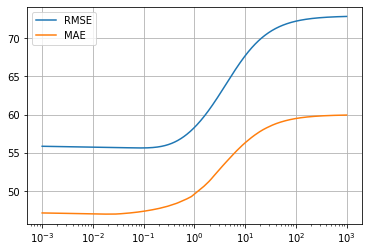

In [7]:
samples = np.logspace(-3, 3, num = 1000)
rmse, mae, r2 = [], [], []
for sample in samples:
    L2_regression = Ridge(alpha = sample)
    L2_regression.fit(X_train, y_train)
    prediction = L2_regression.predict(X_test)
    rmse.append(MSE(y_test, prediction) ** 0.5)
    mae.append(MAE(y_test, prediction))
    r2.append(R2(y_test, prediction))
plt.xscale('log')
plt.plot(samples, rmse, label='RMSE')
plt.plot(samples, mae ,label='MAE')
plt.legend()
plt.grid()

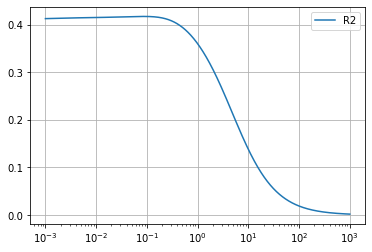

In [8]:
plt.xscale('log')
plt.plot(samples, r2 ,label='R2')
plt.legend()
plt.grid()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [9]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=256)

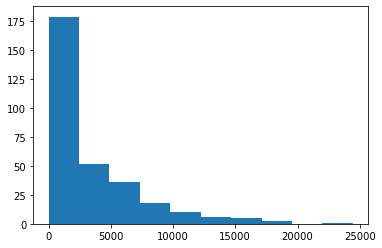

In [12]:
mse = []
L2_regression = Ridge(alpha = 0.6)
L2_regression.fit(X_train, y_train)
prediction = L2_regression.predict(X_train)
for i in range(len(y_train)):
    mse.append((prediction[i] - y_train[i]) ** 2)
plt.hist(mse)
mse_n = np.array(mse)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [13]:
top_percentile = 59
x_train_new, y_train_new = X_train[mse_n < np.percentile(mse_n, top_percentile)], y_train[mse_n < np.percentile(mse_n, top_percentile)]
L2_regression_new = Ridge(alpha = 0.6)
L2_regression_new.fit(x_train_new, y_train_new)
top_prediction = L2_regression_new.predict(X_test)
for prcentile in range(60, 101):
    x_train_new, y_train_new = X_train[mse_n < np.percentile(mse_n, prcentile)], y_train[mse_n < np.percentile(mse_n, prcentile)]
    L2_regression_new = Ridge(alpha = 0.6)
    L2_regression_new.fit(x_train_new, y_train_new)
    prediction_new = L2_regression_new.predict(X_test)
    if MSE(y_test, prediction_new) < MSE(y_test, top_prediction):
        top_percentile = prcentile
        top_prediction = prediction_new
print(top_percentile)

99


In [14]:
prediction = L2_regression.predict(X_test)
print('Before:')
print(f'RMSE: {MSE(y_test, prediction) ** 0.5}')
print(f'MAE: {MAE(y_test, prediction)}')
print(f'R2: {R2(y_test, prediction)}')
x_train_new, y_train_new = X_train[mse_n < np.percentile(mse_n, top_percentile)], y_train[mse_n < np.percentile(mse_n, top_percentile)]
L2_regression_new = Ridge(alpha = 0.6)
L2_regression_new.fit(x_train_new, y_train_new)
top_prediction = L2_regression_new.predict(X_test)
print('After:')
print(f'RMSE: {MSE(y_test, top_prediction) ** 0.5}')
print(f'MAE: {MAE(y_test, top_prediction)}')
print(f'R2: {R2(y_test, top_prediction)}')

Before:
RMSE: 54.5609218174342
MAE: 47.73039303462776
R2: 0.4271304001328706
After:
RMSE: 54.48438305778411
MAE: 47.52331577210108
R2: 0.4287365304099784


__Задание 3.__ Отчёт

**(2 балла)**

Я попробовал удалять элементы с максимальной ошибкой в разных перцентилях, но перебрав все адекватные перцентили, понял, что лучше вообще не удалять ничего. Возможно это происходит так, потому что недостаточно данных и каждый объект даёт свой вклад в обученность на этом уровне. Но мне удалось пошаффлить тестовые данные, что ошибки стали чуть ниже(_RMSE = 58 -> 54, MAE = 49 -> 47_)